# Notebook 03 - Exploratory Data Analysis (EDA)

In this notebook, we will explore the cleaned dataset that we prepared earlier in Notebook 2 (02_Data_Loading_And_Preprocessing.ipynb). The dataset contains information about patients, including their age, gender, cognitive test scores, health status, and lifestyle habits.
Our goal is to understand how these different features relate to the diagnosis of Alzheimer’s disease. We will look at distributions, compare groups, and study relationships between variables to find out which features are most useful for predicting the risk of Alzheimer’s.


This step is important because it helps us decide which data to use in the machine learning model that we will build later in Notebook 4 (04_Model_Training_and_Evaluation). It also supports our overall project goal of using Business Intelligence and AI to help doctors identify people who might be at risk earlier.

## Research Questions

In this notebook, we will look into some of the main research questions from our project, using data analysis to explore and better understand them:

1. Can we predict the risk of Alzheimer's disease based on demographic and lifestyle factors such as age, gender, physical activity, and diet?
- We will look for clear patterns that separate patients with Alzheimer’s from those without.
- We will check if features like age, MMSE score, or physical activity are linked to diagnosis outcomes.


2. Which health and lifestyle features are most predictive of an Alzheimer’s diagnosis?
- We will explore which features show strong differences between groups and are good candidates for use in a prediction model.



## Set up Environment

In [67]:
# Ensure parent directory is in the path so "utils" can be imported
import sys
sys.path.append("..")

# Imports and initialization
from utils.setup_notebook import init_environment, load_csv, quick_overview
from utils.save_tools import save_plot, save_notebook_and_summary

import seaborn as sns
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
from IPython.display import display

# Initialize folders and styles
init_environment()

Environment setup complete.


## Load and Preview Data

In [70]:
# Load the cleaned Alzheimer dataset
df = load_csv("../data/alzheimers_clean.csv")

# Quick structured overview
quick_overview(df)

Loaded data from ../data/alzheimers_clean.csv with shape (2149, 33)
----- Dataset Shape -----
Rows: 2149, Columns: 33

----- Data Types and Non-Null Counts -----
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2149 entries, 0 to 2148
Columns: 33 entries, Age to Diagnosis
dtypes: float64(12), int64(21)
memory usage: 554.2 KB


None


----- Statistical Summary -----
This summary includes counts, mean, standard deviation, min, max, and percentiles for numeric and categorical columns.



,Age,Gender,Ethnicity,EducationLevel,BMI,Smoking,AlcoholConsumption,PhysicalActivity,DietQuality,SleepQuality,FamilyHistoryAlzheimers,CardiovascularDisease,Diabetes,Depression,HeadInjury,Hypertension,SystolicBP,DiastolicBP,CholesterolTotal,CholesterolLDL,CholesterolHDL,CholesterolTriglycerides,MMSE,FunctionalAssessment,MemoryComplaints,BehavioralProblems,ADL,Confusion,Disorientation,PersonalityChanges,DifficultyCompletingTasks,Forgetfulness,Diagnosis
count,2149.000000,2149.000000,2149.000000,2149.000000,2149.000000,2149.000000,2149.000000,2149.000000,2149.000000,2149.000000,2149.000000,2149.000000,2149.000000,2149.000000,2149.000000,2149.000000,2149.000000,2149.000000,2149.000000,2149.000000,2149.000000,2149.000000,2149.000000,2149.000000,2149.000000,2149.000000,2149.000000,2149.000000,2149.000000,2149.000000,2149.000000,2149.000000,2149.000000
mean,74.908795,0.506282,0.697534,1.286645,27.655697,0.288506,10.039442,4.920202,4.993138,7.051081,0.252210,0.144253,0.150768,0.200558,0.092601,0.148906,134.264774,89.847836,225.197519,124.335944,59.463533,228.281496,14.755132,5.080055,0.208004,0.156817,4.982958,0.205212,0.158213,0.150768,0.158678,0.301536,0.353653
std,8.990221,0.500077,0.996128,0.904527,7.217438,0.453173,5.757910,2.857191,2.909055,1.763573,0.434382,0.351428,0.357906,0.400511,0.289940,0.356079,25.949352,17.592496,42.542233,43.366584,23.139174,101.986721,8.613151,2.892743,0.405974,0.363713,2.949775,0.403950,0.365026,0.357906,0.365461,0.459032,0.478214
min,60.000000,0.000000,0.000000,0.000000,15.008851,0.000000,0.002003,0.003616,0.009385,4.002629,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,90.000000,60.000000,150.093316,50.230707,20.003434,50.407194,0.005312,0.000460,0.000000,0.000000,0.001288,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,67.000000,0.000000,0.000000,1.000000,21.611408,0.000000,5.139810,2.570626,2.458455,5.482997,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,112.000000,74.000000,190.252963,87.195798,39.095698,137.583222,7.167602,2.566281,0.000000,0.000000,2.342836,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,75.000000,1.000000,0.000000,1.000000,27.823924,0.000000,9.934412,4.766424,5.076087,7.115646,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,134.000000,91.000000,225.086430,123.342593,59.768237,230.301983,14.441660,5.094439,0.000000,0.000000,5.038973,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
75%,83.000000,1.000000,1.000000,2.000000,33.869778,1.000000,15.157931,7.427899,7.558625,8.562521,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,157.000000,105.000000,262.031657,161.733733,78.939050,314.839046,22.161028,7.546981,0.000000,0.000000,7.581490,0.000000,0.000000,0.000000,0.000000,1.000000,1.000000
max,90.000000,1.000000,3.000000,3.000000,39.992767,1.000000,19.989293,9.987429,9.998346,9.999840,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,179.000000,119.000000,299.993352,199.965665,99.980324,399.941862,29.991381,9.996467,1.000000,1.000000,9.999747,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000



----- First 5 Rows -----


,Age,Gender,Ethnicity,EducationLevel,BMI,Smoking,AlcoholConsumption,PhysicalActivity,DietQuality,SleepQuality,FamilyHistoryAlzheimers,CardiovascularDisease,Diabetes,Depression,HeadInjury,Hypertension,SystolicBP,DiastolicBP,CholesterolTotal,CholesterolLDL,CholesterolHDL,CholesterolTriglycerides,MMSE,FunctionalAssessment,MemoryComplaints,BehavioralProblems,ADL,Confusion,Disorientation,PersonalityChanges,DifficultyCompletingTasks,Forgetfulness,Diagnosis
0,73,0,0,2,22.927749,0,13.297218,6.327112,1.347214,9.025679,0,0,1,1,0,0,142,72,242.366840,56.150897,33.682563,162.189143,21.463532,6.518877,0,0,1.725883,0,0,0,1,0,0
1,89,0,0,0,26.827681,0,4.542524,7.619885,0.518767,7.151293,0,0,0,0,0,0,115,64,231.162595,193.407996,79.028477,294.630909,20.613267,7.118696,0,0,2.592424,0,0,0,0,1,0
2,73,0,3,1,17.795882,0,19.555085,7.844988,1.826335,9.673574,1,0,0,0,0,0,99,116,284.181858,153.322762,69.772292,83.638324,7.356249,5.895077,0,0,7.119548,0,1,0,1,0,0
3,74,1,0,1,33.800817,1,12.209266,8.428001,7.435604,8.392554,0,0,0,0,0,0,118,115,159.582240,65.366637,68.457491,277.577358,13.991127,8.965106,0,1,6.481226,0,0,0,0,0,0
4,89,0,0,0,20.716974,0,18.454356,6.310461,0.795498,5.597238,0,0,0,0,0,0,94,117,237.602184,92.869700,56.874305,291.198780,13.517609,6.045039,0,0,0.014691,0,0,1,1,0,0


### Output
The dataset contains information about each patient, including demographic details (like age and gender), clinical test scores (such as MMSE and CDR), and possibly lifestyle-related features.

By running a quick overview, we can check how many rows and columns the dataset has, what types of data are included, and whether the structure looks correct. This also helps us confirm that the cleaning process in Notebook 2 was successful and that the data is ready for analysis.


In [ ]:
## 

Diagnosis distribution:
Diagnosis
0    1389
1     760
Name: count, dtype: int64


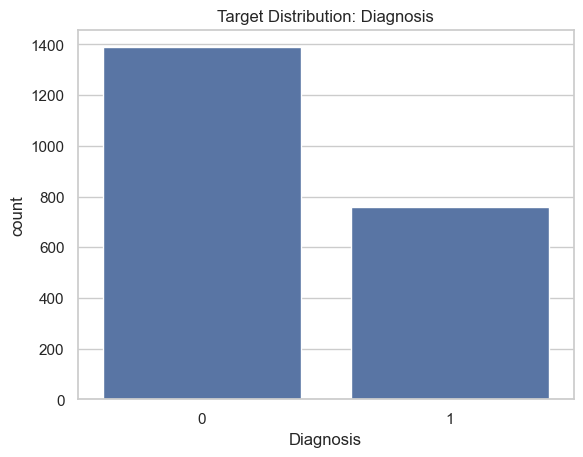

Plot saved to: ../plots/Diagnosis_distribution.png
Caption saved to: ../plots/Diagnosis_distribution.txt


In [74]:
# Define the target column
target_column = "Diagnosis"

# Display class counts
print("Diagnosis distribution:")
print(df[target_column].value_counts())

# Plot the distribution
fig, ax = plt.subplots()
sns.countplot(x=target_column, data=df, ax=ax)
ax.set_title(f"Target Distribution: {target_column}")
plt.show()

# Save plot for Streamlit/app use
save_plot(fig, f"{target_column}_distribution.png", caption="Distribution of Alzheimer’s diagnosis categories")

In [18]:
# Define target variable
target_column = "Diagnosis"  # Adjust if your target is different

# Identify numeric columns
numeric_cols = df.select_dtypes(include=np.number).columns.tolist()
print(f"Numeric columns: {numeric_cols}")

Numeric columns: ['Age', 'Gender', 'Ethnicity', 'EducationLevel', 'BMI', 'Smoking', 'AlcoholConsumption', 'PhysicalActivity', 'DietQuality', 'SleepQuality', 'FamilyHistoryAlzheimers', 'CardiovascularDisease', 'Diabetes', 'Depression', 'HeadInjury', 'Hypertension', 'SystolicBP', 'DiastolicBP', 'CholesterolTotal', 'CholesterolLDL', 'CholesterolHDL', 'CholesterolTriglycerides', 'MMSE', 'FunctionalAssessment', 'MemoryComplaints', 'BehavioralProblems', 'ADL', 'Confusion', 'Disorientation', 'PersonalityChanges', 'DifficultyCompletingTasks', 'Forgetfulness', 'Diagnosis']


In [20]:
# Visualize class balance of the target
fig, ax = plt.subplots()
sns.countplot(x=target_column, data=df, ax=ax)
ax.set_title(f"Distribution of Target: {target_column}")
save_plot(fig, f"{target_column}_distribution.png", caption="Distribution of the target variable (Diagnosis)")

Plot saved to: ../plots/Diagnosis_distribution.png
Caption saved to: ../plots/Diagnosis_distribution.txt


<Figure size 640x480 with 0 Axes>

In [22]:
### Interpretation 

This plot shows the number of samples per diagnosis category. If class imbalance is observed, it should be addressed in model evaluation using stratification, balancing, or sampling.

In [ ]:
## Histograms of Numeric Features

In [31]:
# Distribution of numeric features
for col in numeric_cols:
    fig, ax = plt.subplots()
    sns.histplot(df[col], kde=True, ax=ax)
    ax.set_title(f"Distribution of {col}")
    save_plot(fig, f"{col}_distribution.png", caption=f"Distribution of {col}")


Plot saved to: ../plots/Age_distribution.png
Caption saved to: ../plots/Age_distribution.txt
Plot saved to: ../plots/Gender_distribution.png
Caption saved to: ../plots/Gender_distribution.txt
Plot saved to: ../plots/Ethnicity_distribution.png
Caption saved to: ../plots/Ethnicity_distribution.txt
Plot saved to: ../plots/EducationLevel_distribution.png
Caption saved to: ../plots/EducationLevel_distribution.txt
Plot saved to: ../plots/BMI_distribution.png
Caption saved to: ../plots/BMI_distribution.txt
Plot saved to: ../plots/Smoking_distribution.png
Caption saved to: ../plots/Smoking_distribution.txt
Plot saved to: ../plots/AlcoholConsumption_distribution.png
Caption saved to: ../plots/AlcoholConsumption_distribution.txt
Plot saved to: ../plots/PhysicalActivity_distribution.png
Caption saved to: ../plots/PhysicalActivity_distribution.txt
Plot saved to: ../plots/DietQuality_distribution.png
Caption saved to: ../plots/DietQuality_distribution.txt
Plot saved to: ../plots/SleepQuality_distri

/var/folders/ct/0p5jxxp54xlcjs_q4dwkbdd80000gn/T/ipykernel_68317/2299304635.py:3: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`). Consider using `matplotlib.pyplot.close()`.
  fig, ax = plt.subplots()


Plot saved to: ../plots/CholesterolHDL_distribution.png
Caption saved to: ../plots/CholesterolHDL_distribution.txt
Plot saved to: ../plots/CholesterolTriglycerides_distribution.png
Caption saved to: ../plots/CholesterolTriglycerides_distribution.txt
Plot saved to: ../plots/MMSE_distribution.png
Caption saved to: ../plots/MMSE_distribution.txt
Plot saved to: ../plots/FunctionalAssessment_distribution.png
Caption saved to: ../plots/FunctionalAssessment_distribution.txt
Plot saved to: ../plots/MemoryComplaints_distribution.png
Caption saved to: ../plots/MemoryComplaints_distribution.txt
Plot saved to: ../plots/BehavioralProblems_distribution.png
Caption saved to: ../plots/BehavioralProblems_distribution.txt
Plot saved to: ../plots/ADL_distribution.png
Caption saved to: ../plots/ADL_distribution.txt
Plot saved to: ../plots/Confusion_distribution.png
Caption saved to: ../plots/Confusion_distribution.txt
Plot saved to: ../plots/Disorientation_distribution.png
Caption saved to: ../plots/Disor

<Figure size 640x480 with 0 Axes>

<Figure size 640x480 with 0 Axes>

<Figure size 640x480 with 0 Axes>

<Figure size 640x480 with 0 Axes>

<Figure size 640x480 with 0 Axes>

<Figure size 640x480 with 0 Axes>

<Figure size 640x480 with 0 Axes>

<Figure size 640x480 with 0 Axes>

<Figure size 640x480 with 0 Axes>

<Figure size 640x480 with 0 Axes>

<Figure size 640x480 with 0 Axes>

<Figure size 640x480 with 0 Axes>

<Figure size 640x480 with 0 Axes>

<Figure size 640x480 with 0 Axes>

<Figure size 640x480 with 0 Axes>

<Figure size 640x480 with 0 Axes>

<Figure size 640x480 with 0 Axes>

<Figure size 640x480 with 0 Axes>

<Figure size 640x480 with 0 Axes>

<Figure size 640x480 with 0 Axes>

<Figure size 640x480 with 0 Axes>

<Figure size 640x480 with 0 Axes>

<Figure size 640x480 with 0 Axes>

<Figure size 640x480 with 0 Axes>

<Figure size 640x480 with 0 Axes>

<Figure size 640x480 with 0 Axes>

<Figure size 640x480 with 0 Axes>

<Figure size 640x480 with 0 Axes>

<Figure size 640x480 with 0 Axes>

<Figure size 640x480 with 0 Axes>

<Figure size 640x480 with 0 Axes>

<Figure size 640x480 with 0 Axes>

<Figure size 640x480 with 0 Axes>

In [ ]:
## Grouped Statistics by Target

In [ ]:
# Mean values by target class
grouped_means = df.groupby(target_column)[numeric_cols].mean().T
display(grouped_means)

In [ ]:
## Correlation Matrix

In [ ]:
# Heatmap of correlation between numeric variables
fig, ax = plt.subplots(figsize=(12, 10))
corr_matrix = df[numeric_cols].corr()
sns.heatmap(corr_matrix, annot=True, fmt=".2f", cmap="coolwarm", ax=ax)
ax.set_title("Correlation Matrix")
save_plot(fig, "correlation_heatmap.png", caption="Correlation matrix among numeric features")

In [ ]:
## Boxplots of Features by Target Class

In [ ]:
# Compare feature distributions across target categories
for col in numeric_cols:
    fig, ax = plt.subplots()
    sns.boxplot(x=target_column, y=col, data=df, ax=ax)
    ax.set_title(f"{col} by {target_column}")
    save_plot(fig, f"{col}_boxplot.png", caption=f"Boxplot of {col} by target class")

In [ ]:
## Notebook Summary

In [ ]:
-----------------------------

In [ ]:
## Statistics of Cleaned Data

In [ ]:
# Descriptive statistics
df_clean.describe()

In [ ]:
### Output

We see a full summary of the numeric columns in our cleaned dataset. This includes useful values like the mean, standard deviation, minimum and maximum, and the 25th, 50th (median), and 75th percentiles for each feature.

Some columns, like Gender, Smoking, and Diagnosis, only contain values between 0 and 1. That means they are binary — either yes or no. For example, the mean of Diagnosis is about 0.35, which tells us that roughly 35% of the patients are diagnosed with the condition.

Other columns, like BMI, Age, and Cholesterol, have a much wider range. These are continuous features, and we will likely need to scale them before using them in a machine learning model.

This output helps us understand what kind of data we are working with. It also confirms that everything looks complete and consistent, which is important before moving on to visualizations or further analysis.

In [ ]:
## Boxplots – All Numeric Variables

We first tried creating a boxplot of all numeric features in the dataset. Boxplots are useful for showing the distribution of values, including the median, quartiles, and possible outliers.

In [ ]:
# Boxplot of all numeric variables
plt.figure(figsize=(14, 8))
sns.boxplot(data=df_clean.select_dtypes(include='number'), orient="h")
plt.title("Boxplot of All Numeric Features")
plt.show()

In [ ]:
### Output

We see that the boxplot is difficult to interpret because some features, like PatientID, have very large values, while others are binary or have very small ranges. This large difference in scale causes most of the boxes to be compressed or almost invisible.

This shows that combining all numeric features into one boxplot is not very useful when the variables have very different value ranges. The result is a plot that does not give us any clear insight.
z

In [ ]:
## Boxplots – Selected Continuous Features

To get a clearer overview, we selected only a few continuous features that are on similar scales. This makes it easier to see the spread of values, compare medians, and identify outliers.

We included variables like BMI, PhysicalActivity, DietQuality, and several cholesterol-related columns. These features have measurable ranges and are good candidates for comparison. This approach gives us a much more readable and meaningful visualization.


In [ ]:
# Select continuous numeric columns for clearer boxplots
columns_to_plot = [
    "BMI", "PhysicalActivity", "DietQuality", "SleepQuality",
    "CholesterolTotal", "CholesterolLDL", "CholesterolHDL", "MMSE"
]

plt.figure(figsize=(12, 6))
sns.boxplot(data=df_clean[columns_to_plot], orient="h")
plt.title("Boxplot of Selected Continuous Features")
plt.show()

In [ ]:
### Output

We see that the boxplots now clearly show the distribution of each selected variable. We can observe the range of values, the middle 50% (the box), and any outliers outside the whiskers.

For example, CholesterolLDL and MMSE show wider ranges, while features like PhysicalActivity and DietQuality have smaller, more concentrated distributions. This tells us that these variables may need different kinds of preprocessing (like scaling) before we use them in a machine learning model.

In [ ]:
## Boxplots – Log-Transformed Features

To improve the clarity of the boxplots even more, we applied a log transformation to each feature. Log transformation helps reduce skew, especially when there are a few very large values.

This technique compresses the scale of high values and stretches the scale of low values, making the distributions easier to compare side by side. We used log(1 + x) to safely handle values near zero.

In [ ]:
# Apply log transform to reduce skew before plotting
import numpy as np

df_log = df_clean[columns_to_plot].apply(lambda x: np.log1p(x))  # log(1 + x)

plt.figure(figsize=(12, 6))
sns.boxplot(data=df_log, orient="h")
plt.title("Boxplot of Log-Transformed Continuous Features")
plt.show()

In [ ]:
### Output

We see that the log-transformed boxplots are more balanced and evenly spread. The variables are easier to compare visually, and patterns in the data are more visible. For example, MMSE had a very wide spread in the original scale, but after transformation we can clearly see its shape and outliers. The same applies to Cholesterol features.
This confirms that log transformation is a helpful tool for visualizing skewed data and preparing features for machine learning models.

In [ ]:
## Plot Histograms for Numeric Variables

In [ ]:
# Histogram grid for feature distributions
df_clean.hist(figsize=(16, 12), bins=20)
plt.suptitle("Histogram of Features", fontsize=16)
plt.tight_layout()
plt.show()

In [ ]:
#### Detect Outliers Using IQR

In [ ]:
def detect_outliers_iqr(df, columns):
    """
    Returns a DataFrame of rows considered outliers in any specified column using IQR method.
    """
    outlier_indices = []

    for col in columns:
        Q1 = df[col].quantile(0.25)
        Q3 = df[col].quantile(0.75)
        IQR = Q3 - Q1
        lower_bound = Q1 - 1.5 * IQR
        upper_bound = Q3 + 1.5 * IQR

        outliers = df[(df[col] < lower_bound) | (df[col] > upper_bound)].index
        outlier_indices.extend(outliers)

    outlier_indices = list(set(outlier_indices))
    return df.loc[outlier_indices]

In [ ]:
#### View and Count Outliers

In [ ]:
# Detect outliers in numeric columns
numeric_cols = df_clean.select_dtypes(include=[np.number]).columns
outliers_df = detect_outliers_iqr(df_clean, numeric_cols)

print(f"Total rows with outliers: {outliers_df.shape[0]}")
outliers_df.head()


In [ ]:
#### Remove Outliers

In [ ]:
# Remove detected outliers
df_no_outliers = df_clean.drop(outliers_df.index)

print(f"Shape after removing outliers: {df_no_outliers.shape}")


In [ ]:
#### Save dataset

In [ ]:
# Save outlier-free data
df_no_outliers.to_csv("../data/alzheimers_no_outliers.csv", index=False)


In [ ]:
#### Correlation Matrix

In [ ]:
# Correlation heatmap
plt.figure(figsize=(12, 8))
sns.heatmap(df_no_outliers.corr(numeric_only=True), annot=True, cmap="coolwarm", fmt=".2f")
plt.title("Correlation Matrix (Outlier-Free Data)")
plt.show()



In [ ]:
#### Pairplot for Highly Correlated Features

In [ ]:
# Optional: select top correlated variables for pairplot
corr_matrix = df_no_outliers.corr(numeric_only=True)
top_corr = corr_matrix.abs().unstack().sort_values(ascending=False)
top_pairs = top_corr[(top_corr < 1.0)].drop_duplicates().head(3)

cols = list(set([i for pair in top_pairs.index for i in pair]))
sns.pairplot(df_no_outliers[cols])
plt.suptitle("Pairplot of Top Correlated Features")
plt.show()

In [ ]:
#### Feature Scaling

In [ ]:
# Standardize numeric columns
scaler = StandardScaler()
df_scaled = df_no_outliers.copy()
df_scaled[numeric_cols] = scaler.fit_transform(df_no_outliers[numeric_cols])
